# Project Proposal
### Group 14
By: Angela, Tina, Tom, and Yiyang

Title: Predicting the Risk of Diabetes

Introduction:

Our project will be on determining the risk of an individual to have diabetes. We will predict this using BMI and glucose levels as our variables. Diabetes is a lifelong health condition that affects how

How does BMI and glucose levels affect the risk of whether someone has diabetes or not in pregnant people?

Preliminary Exploratory Data Analysis:

Methods:

Expected Outcomes and Significance:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
diabetes_data <- read_csv("data/diabetes.csv")
diabetes_data

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


1 -> diabetic; 0 -> undiabetic

In [3]:
diabetes_data <- diabetes_data |>
  
  mutate(Outcome = as_factor(Outcome)) 
diabetes_data

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


What are the best variables, K values, and recipe to code for a medically useful tool that can accurately predicts pregnant women's diabetes risk?

Another possible research question: is there a trend between glucose levels and bloodpressure (or some other variables) with respect to pregnancy?
-create a scatterplot with X/Y for glucose/bloodpressure and split # of pregnancies based on colour, can also use different shapes to separate presence of diabetes

In [10]:
filter(diabetes_data, Pregnancies!=0)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


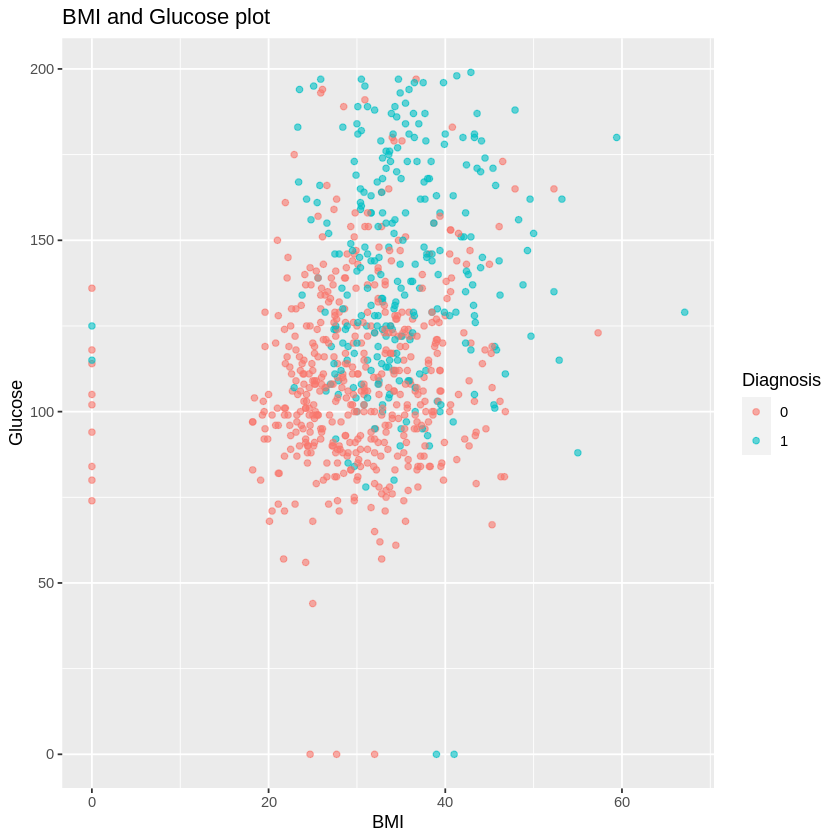

In [11]:
BMIGlucose_plot <- ggplot(diabetes_data, aes(x = BMI, y = Glucose, color = Outcome)) +
  geom_point(alpha = 0.6) +
  labs(x = "BMI", 
       y = "Glucose",
       color = "Diagnosis") +
ggtitle("BMI and Glucose plot")

 
BMIGlucose_plot

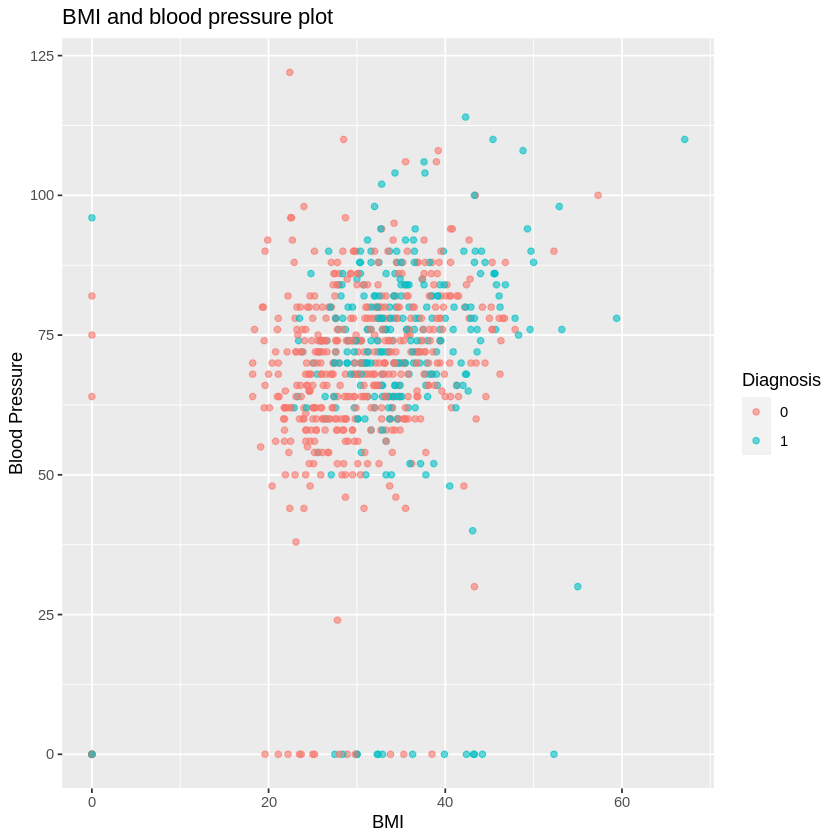

In [12]:
BMIBloodpressure_plot <- ggplot(diabetes_data, aes(x = BMI, y = BloodPressure, color = Outcome)) +
  geom_point(alpha = 0.6) +
  labs(x = "BMI", 
       y = "Blood Pressure",
       color = "Diagnosis") +
ggtitle("BMI and blood pressure plot")

 
BMIBloodpressure_plot

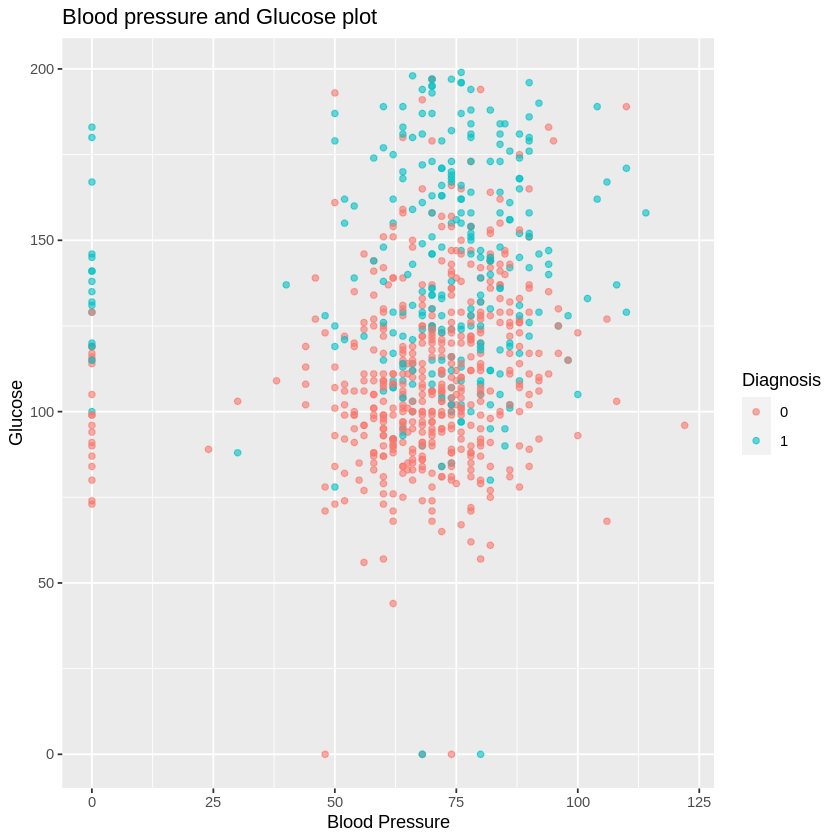

In [13]:
bloodpressureGlucose_plot <- ggplot(diabetes_data, aes(x = BloodPressure, y = Glucose, color = Outcome)) +
  geom_point(alpha = 0.6) +
  labs(x = "Blood Pressure", 
       y = "Glucose",
       color = "Diagnosis") +
ggtitle("Blood pressure and Glucose plot")

 
bloodpressureGlucose_plot